In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


# Portfolio

| Sector     | Company                | Ticker |
| ---------- | ---------------------- | ------ |
| Tech       | Apple                  | AAPL   |
| Tech       | Microsoft              | MSFT   |
| Tech       | NVIDIA                 | NVDA   |
| Tech       | Alphabet (Class A)     | GOOGL  |
| Tech       | Meta Platforms         | META   |
| Financials | Berkshire Hathaway (B) | BRK-B  |
| Insurance  | Chubb Limited          | CB     |
| Insurance  | AIG                    | AIG    |
| Banks      | JPMorgan Chase         | JPM    |
| Banks      | Bank of America        | BAC    |
| Banks      | Goldman Sachs          | GS     |
| Retail     | Walmart                | WMT    |
| Retail     | Home Depot             | HD     |
| Retail     | Costco                 | COST   |


In [8]:
tickers = [
    'AAPL','MSFT','NVDA','GOOGL','META',
    'BRK-B','CB','AIG',
    'JPM','BAC','GS',
    'WMT','HD','COST'
]

Market Cap weighted portfolio:

In [9]:
# sourced online bc yfinance is unreliable
market_caps_dict = {
    'AAPL': 3000,
    'MSFT': 2900,
    'NVDA': 2200,
    'GOOGL': 1900,
    'META': 1200,
    'BRK-B': 850,   # Berkshire Hathaway (Class B)
    'CB': 100,
    'AIG': 45,
    'JPM': 450,
    'BAC': 260,
    'GS': 130,
    'WMT': 520,
    'HD': 330,
    'COST': 380
}

market_caps = np.array([v * 1e9 for v in market_caps_dict.values()])
cap_weights = market_caps / market_caps.sum()

In [10]:
equal_weights = np.array([1/len(market_caps_dict)] * len(market_caps_dict))

for ticker, cap_w, eq_w in zip(market_caps_dict.keys(), cap_weights, equal_weights):
    print(f"{ticker}:  Cap Weight = {cap_w:.2%}   |   Equal Weight = {eq_w:.2%}")


AAPL:  Cap Weight = 21.03%   |   Equal Weight = 7.14%
MSFT:  Cap Weight = 20.33%   |   Equal Weight = 7.14%
NVDA:  Cap Weight = 15.42%   |   Equal Weight = 7.14%
GOOGL:  Cap Weight = 13.32%   |   Equal Weight = 7.14%
META:  Cap Weight = 8.41%   |   Equal Weight = 7.14%
BRK-B:  Cap Weight = 5.96%   |   Equal Weight = 7.14%
CB:  Cap Weight = 0.70%   |   Equal Weight = 7.14%
AIG:  Cap Weight = 0.32%   |   Equal Weight = 7.14%
JPM:  Cap Weight = 3.15%   |   Equal Weight = 7.14%
BAC:  Cap Weight = 1.82%   |   Equal Weight = 7.14%
GS:  Cap Weight = 0.91%   |   Equal Weight = 7.14%
WMT:  Cap Weight = 3.65%   |   Equal Weight = 7.14%
HD:  Cap Weight = 2.31%   |   Equal Weight = 7.14%
COST:  Cap Weight = 2.66%   |   Equal Weight = 7.14%


# Get historical adj closed prices

In [12]:
tickers = list(market_caps_dict.keys())

data = yf.download(tickers, start='2020-01-01', end='2025-01-01')  # auto_adjust=True by default
data = data['Close']  # Get adjusted close prices
data = data.dropna()  # Drop rows with missing prices
data.tail()

C:\Users\User\AppData\Local\Temp\ipykernel_21980\1021564525.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2020-01-01', end='2025-01-01')  # auto_adjust=True by default
[*********************100%***********************]  14 of 14 completed


Ticker,AAPL,AIG,BAC,BRK-B,CB,COST,GOOGL,GS,HD,JPM,META,MSFT,NVDA,WMT
Date,,,,,,,,,,,,,,
2024-12-24,257.578674,72.109322,43.843319,458.660004,275.667877,956.515503,195.647552,577.038086,391.210724,238.440521,606.742920,437.647369,140.197372,92.203255
2024-12-26,258.396667,72.604301,44.011265,459.079987,277.392426,953.841919,195.138763,575.493469,390.223175,239.257263,602.350220,436.432068,139.907410,92.312691
2024-12-27,254.974930,72.267715,43.803802,456.510010,276.804291,937.441406,192.305450,570.493408,387.971527,237.318726,598.816040,428.881104,136.987885,91.188515
2024-12-30,251.593094,71.822235,43.379002,452.160004,274.541443,919.993530,190.789032,567.889282,384.584198,235.498260,590.260254,423.202911,137.467804,90.104111
2024-12-31,249.817383,72.069733,43.418518,453.279999,275.428619,914.067749,188.853622,566.968506,384.149689,235.882050,584.539795,419.885681,134.268326,89.885246


# Daily returns

In [ ]:
returns = data.pct_change().dropna()

Mean Returns & Covariance Matrix

In [ ]:
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Monte Carlo Simulation Setup

In [18]:
# Parameters
num_simulations = 30000
num_days = 252 #trading days in 1 year

In [ ]:
# Prepare empty arrays for storing simulated total returns
simulated_eq_returns = np.zeros(num_simulations)
simulated_cap_returns = np.zeros(num_simulations)

for i in range(num_simulations):
    # Simulate daily returns for all assets over the time horizon (num_days)
    # Each simulation draws from a multivariate normal distribution with historical mean returns and covariance
    simulated_daily_returns = np.random.multivariate_normal(mean_returns, cov_matrix, num_days)
    
    # ---- Equal Weight Portfolio ----
    # For each simulated day, compute portfolio return as the dot product of asset returns and equal weights
    eq_portfolio_returns = simulated_daily_returns @ equal_weights
    
    # Calculate the total cumulative return over the entire simulated period
    # (1 + daily returns) compounded over num_days, minus 1 to express as total return
    simulated_eq_returns[i] = np.prod(1 + eq_portfolio_returns) - 1
    
    # ---- Market Cap Weighted Portfolio ----
    # Repeat the same steps but using market cap weights
    cap_portfolio_returns = simulated_daily_returns @ cap_weights
    simulated_cap_returns[i] = np.prod(1 + cap_portfolio_returns) - 1

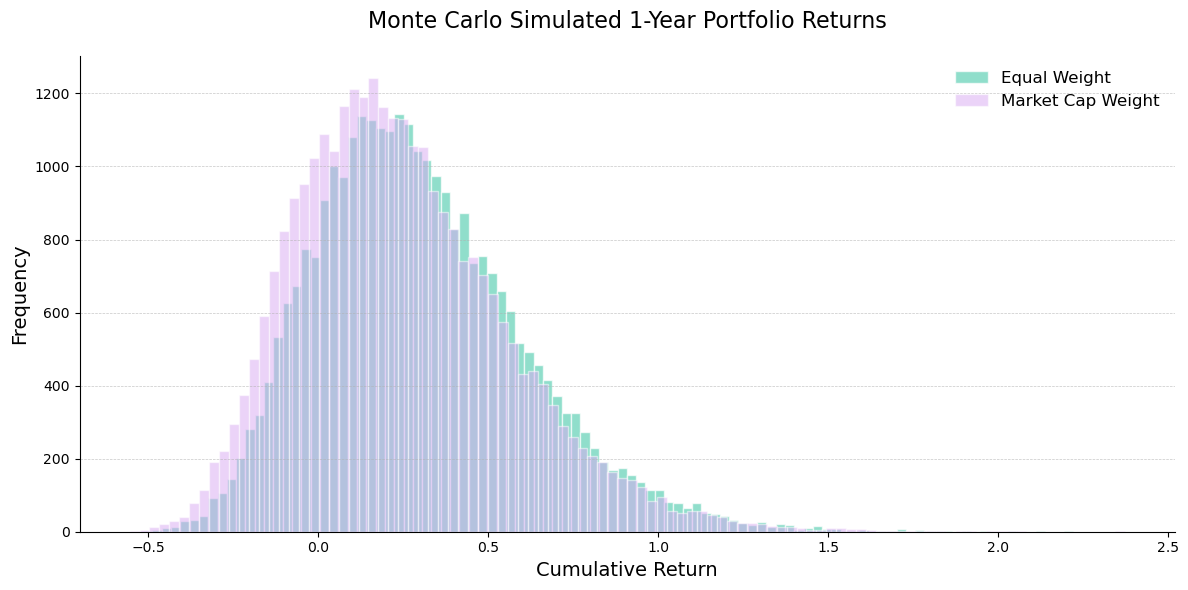

In [26]:
plt.figure(figsize=(12, 6))

# Use pastel colors from matplotlib's Tableau palette
plt.hist(simulated_eq_returns, bins=100, alpha=0.7, label='Equal Weight', color="#61D1B5", edgecolor='white')
plt.hist(simulated_cap_returns, bins=100, alpha=0.5, label='Market Cap Weight', color="#D8A8F2", edgecolor='white')

# Add horizontal grid lines for readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Title & labels with a bit of padding and adjusted fontsize
plt.title('Monte Carlo Simulated 1-Year Portfolio Returns', fontsize=16, pad=20)
plt.xlabel('Cumulative Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Improve legend positioning and style
plt.legend(frameon=False, fontsize=12)

# Remove top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [27]:
def compute_var_cvar(simulated_returns, confidence_level=5):
    var = np.percentile(simulated_returns, confidence_level)
    cvar = simulated_returns[simulated_returns <= var].mean()
    return var, cvar

var_eq, cvar_eq = compute_var_cvar(simulated_eq_returns)
var_cap, cvar_cap = compute_var_cvar(simulated_cap_returns)

print(f"Equal Weight Portfolio — VaR (95%): {var_eq:.2%}, CVaR (95%): {cvar_eq:.2%}")
print(f"Market Cap Portfolio — VaR (95%): {var_cap:.2%}, CVaR (95%): {cvar_cap:.2%}")


Equal Weight Portfolio — VaR (95%): -14.47%, CVaR (95%): -22.46%
Market Cap Portfolio — VaR (95%): -19.65%, CVaR (95%): -27.50%


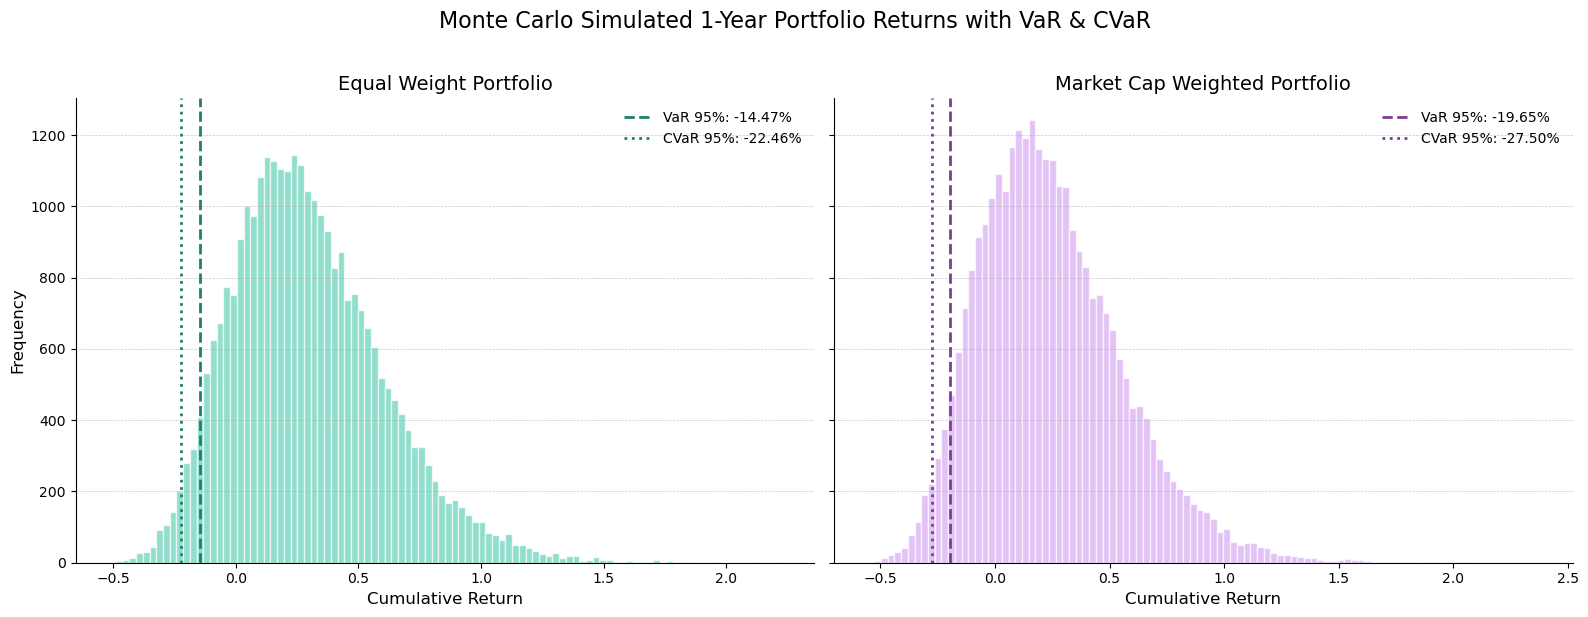

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Equal Weight Portfolio Plot
axes[0].hist(simulated_eq_returns, bins=100, color="#61D1B5", alpha=0.7, edgecolor='white')
axes[0].axvline(var_eq, color='#1E7F6E', linestyle='--', linewidth=2, label=f'VaR 95%: {var_eq:.2%}')
axes[0].axvline(cvar_eq, color='#1E7F6E', linestyle=':', linewidth=2, label=f'CVaR 95%: {cvar_eq:.2%}')
axes[0].set_title('Equal Weight Portfolio', fontsize=14)
axes[0].set_xlabel('Cumulative Return', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
axes[0].legend(frameon=False, fontsize=10)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Market Cap Weighted Portfolio Plot
axes[1].hist(simulated_cap_returns, bins=100, color="#D8A8F2", alpha=0.7, edgecolor='white')
axes[1].axvline(var_cap, color='#7D3C98', linestyle='--', linewidth=2, label=f'VaR 95%: {var_cap:.2%}')
axes[1].axvline(cvar_cap, color='#7D3C98', linestyle=':', linewidth=2, label=f'CVaR 95%: {cvar_cap:.2%}')
axes[1].set_title('Market Cap Weighted Portfolio', fontsize=14)
axes[1].set_xlabel('Cumulative Return', fontsize=12)
axes[1].grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
axes[1].legend(frameon=False, fontsize=10)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.suptitle('Monte Carlo Simulated 1-Year Portfolio Returns with VaR & CVaR', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Equal Weight Portfolio VaR = -14.47%
→ In the worst 5% of cases, you could lose up to 14.47% on your equal-weighted portfolio over 1 year.

Market Cap Portfolio VaR = -19.65%
→ In the worst 5% of cases, you could lose up to 19.65% on your market-cap weighted portfolio.

Equal Weight Portfolio CVaR = -22.46%
→ If you hit the worst 5% of cases, your average loss would be ~22.46%.

Market Cap Portfolio CVaR = -27.50%
→ For the market-cap weighted portfolio, the average worst-case loss is deeper, ~27.50%.

# Statistical Comparison

In [30]:
# Calculate statistics for Equal Weight
mean_eq = simulated_eq_returns.mean()
std_eq = simulated_eq_returns.std()

# Calculate statistics for Market Cap Weight
mean_cap = simulated_cap_returns.mean()
std_cap = simulated_cap_returns.std()

print(f"Equal Weight — Mean Return: {mean_eq:.2%}, Std Dev: {std_eq:.2%}")
print(f"Market Cap Weight — Mean Return: {mean_cap:.2%}, Std Dev: {std_cap:.2%}")

Equal Weight — Mean Return: 29.64%, Std Dev: 31.09%
Market Cap Weight — Mean Return: 24.43%, Std Dev: 31.41%


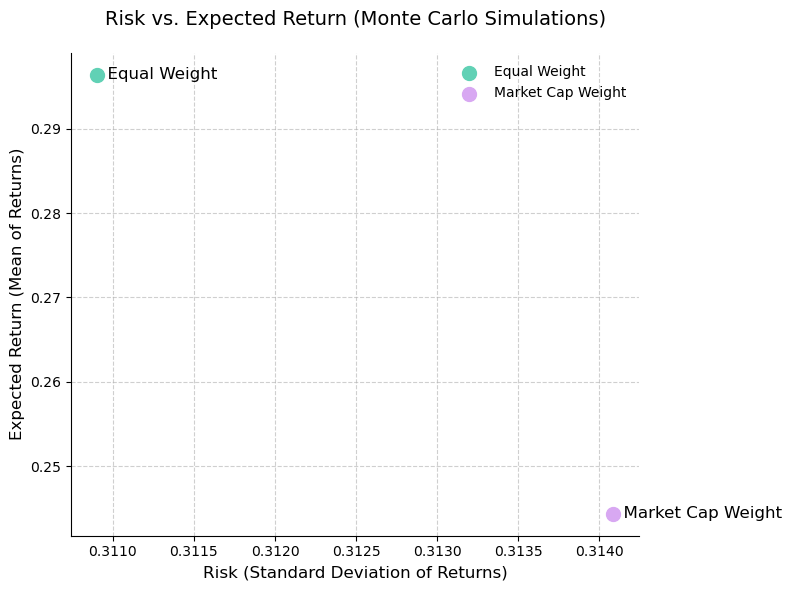

In [31]:
plt.figure(figsize=(8, 6))

# Scatter points
plt.scatter(std_eq, mean_eq, color="#61D1B5", s=100, label='Equal Weight')
plt.scatter(std_cap, mean_cap, color="#D8A8F2", s=100, label='Market Cap Weight')

# Add labels to the points
plt.text(std_eq, mean_eq, '  Equal Weight', fontsize=12, verticalalignment='center')
plt.text(std_cap, mean_cap, '  Market Cap Weight', fontsize=12, verticalalignment='center')

# Axis labels and title
plt.xlabel('Risk (Standard Deviation of Returns)', fontsize=12)
plt.ylabel('Expected Return (Mean of Returns)', fontsize=12)
plt.title('Risk vs. Expected Return (Monte Carlo Simulations)', fontsize=14, pad=20)

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(frameon=False)

# Clean up spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


# Monte Carlo-simulated VaR/CVaR with historical VaR/CVaR

* Historical rolling 1-year returns to estimate VaR and CVaR directly from past market behavior. 

* Purely data-driven method, reflects actual observed risks without relying on distributional assumptions. 

* However, it assumes the future will resemble the past and may underestimate tail risks during unprecedented market conditions.

In [40]:
# ✅ Step 1 — Calculate Historical Daily Returns
historical_returns = data.pct_change().dropna()

# ✅ Step 2 — Compute Daily Portfolio Returns for Both Weighting Strategies
eq_portfolio_daily = historical_returns @ equal_weights
cap_portfolio_daily = historical_returns @ cap_weights

# ✅ Step 3 — Calculate 252-Day Rolling Cumulative Returns (Compounded)
rolling_eq_cum_returns = (eq_portfolio_daily + 1).rolling(window=252).apply(np.prod, raw=True) - 1
rolling_eq_cum_returns = rolling_eq_cum_returns.dropna()

rolling_cap_cum_returns = (cap_portfolio_daily + 1).rolling(window=252).apply(np.prod, raw=True) - 1
rolling_cap_cum_returns = rolling_cap_cum_returns.dropna()

# ✅ Step 4 — Sanity Check for Extreme Values
print(f"Min Equal Weight Rolling Return: {rolling_eq_cum_returns.min():.2%}")
print(f"Min Market Cap Weight Rolling Return: {rolling_cap_cum_returns.min():.2%}")

# ✅ Step 5 — Function to Compute VaR & CVaR
def compute_var_cvar(series, confidence_level=5):
    var = np.percentile(series, confidence_level)
    cvar = series[series <= var].mean()
    return var, cvar

# ✅ Step 6 — Compute Historical VaR & CVaR
hist_var_eq, hist_cvar_eq = compute_var_cvar(rolling_eq_cum_returns)
hist_var_cap, hist_cvar_cap = compute_var_cvar(rolling_cap_cum_returns)

# ✅ Step 7 — Display Results
print(f"Historical Equal Weight — VaR (95%): {hist_var_eq:.2%}, CVaR (95%): {hist_cvar_eq:.2%}")
print(f"Historical Market Cap — VaR (95%): {hist_var_cap:.2%}, CVaR (95%): {hist_cvar_cap:.2%}")


Min Equal Weight Rolling Return: -22.41%
Min Market Cap Weight Rolling Return: -15.84%
Historical Equal Weight — VaR (95%): -15.93%, CVaR (95%): -18.56%
Historical Market Cap — VaR (95%): -8.66%, CVaR (95%): -10.90%


| Portfolio         | VaR (95%) | CVaR (95%) | Min Observed Return |
| ----------------- | --------- | ---------- | ------------------- |
| Equal Weight      | -15.93%   | -18.56%    | -22.41%             |
| Market Cap Weight | -8.66%    | -10.90%    | -15.84%             |


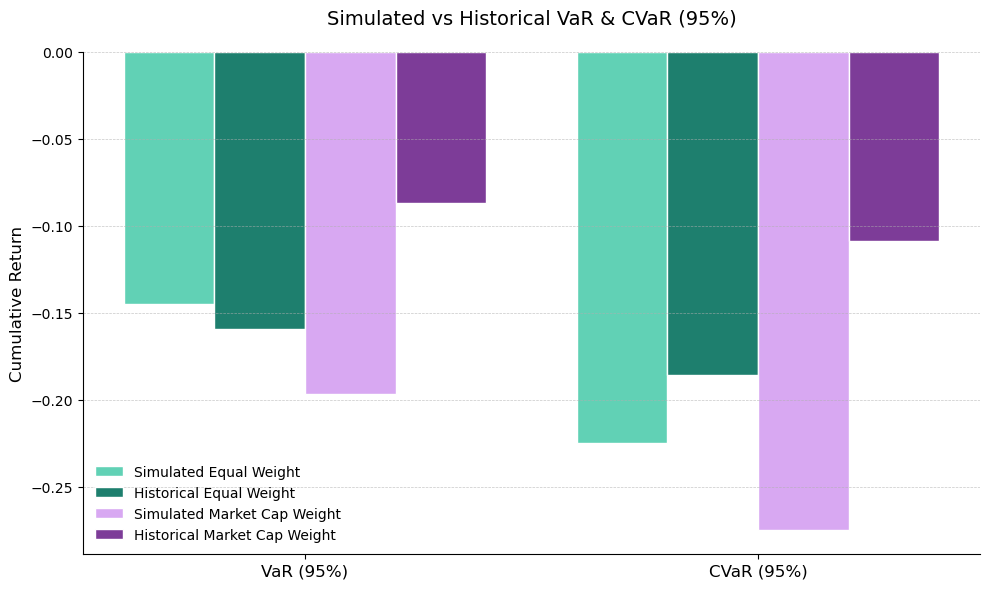

In [39]:
# Bar plot parameters
labels = ['VaR (95%)', 'CVaR (95%)']
equal_values = [var_eq, cvar_eq]
cap_values = [var_cap, cvar_cap]
hist_equal_values = [hist_var_eq, hist_cvar_eq]
hist_cap_values = [hist_var_cap, hist_cvar_cap]

x = np.arange(len(labels))  # Label positions
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bars for Simulated Equal Weight
ax.bar(x - width*1.5, equal_values, width, label='Simulated Equal Weight', color='#61D1B5', edgecolor='white')

# Bars for Historical Equal Weight
ax.bar(x - width*0.5, hist_equal_values, width, label='Historical Equal Weight', color='#1E7F6E', edgecolor='white')

# Bars for Simulated Market Cap Weight
ax.bar(x + width*0.5, cap_values, width, label='Simulated Market Cap Weight', color='#D8A8F2', edgecolor='white')

# Bars for Historical Market Cap Weight
ax.bar(x + width*1.5, hist_cap_values, width, label='Historical Market Cap Weight', color='#7D3C98', edgecolor='white')

# Add labels, title, and grid
ax.set_ylabel('Cumulative Return', fontsize=12)
ax.set_title('Simulated vs Historical VaR & CVaR (95%)', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
ax.legend(frameon=False, fontsize=10)

# Remove top/right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


# Monte Carlo simulation using the Multivariate t-Distribution

In [41]:
def multivariate_t_rvs(mean, cov, df, n):
    """
    Generate random samples from a multivariate t-distribution.
    """
    d = len(mean)
    g = np.random.gamma(df/2., 2./df, n)
    Z = np.random.multivariate_normal(np.zeros(d), cov, n)
    return mean + Z / np.sqrt(g)[:, None]

In [42]:
# num_simulations = 30000
# num_days = 252
df_t = 5  # Degrees of freedom — controls tail thickness

In [44]:
# Prepare arrays to store cumulative returns
simulated_eq_returns_t = np.zeros(num_simulations)
simulated_cap_returns_t = np.zeros(num_simulations)

for i in range(num_simulations):
    simulated_daily_returns_t = multivariate_t_rvs(mean_returns.values, cov_matrix, df_t, num_days)
    
    eq_portfolio_returns_t = simulated_daily_returns_t @ equal_weights
    simulated_eq_returns_t[i] = np.prod(1 + eq_portfolio_returns_t) - 1
    
    cap_portfolio_returns_t = simulated_daily_returns_t @ cap_weights
    simulated_cap_returns_t[i] = np.prod(1 + cap_portfolio_returns_t) - 1



In [45]:
var_eq_t, cvar_eq_t = compute_var_cvar(simulated_eq_returns_t)
var_cap_t, cvar_cap_t = compute_var_cvar(simulated_cap_returns_t)

print(f"t-Dist Equal Weight — VaR (95%): {var_eq_t:.2%}, CVaR (95%): {cvar_eq_t:.2%}")
print(f"t-Dist Market Cap — VaR (95%): {var_cap_t:.2%}, CVaR (95%): {cvar_cap_t:.2%}")


t-Dist Equal Weight — VaR (95%): -24.68%, CVaR (95%): -33.70%
t-Dist Market Cap — VaR (95%): -30.10%, CVaR (95%): -38.61%


Both portfolios show significantly higher VaR and CVaR compared to Normal Monte Carlo and Historical Estimates.
This is expected with a t-distribution, which models fatter tails (more extreme events).

Market Cap Weighted Portfolio again shows deeper downside risk, meaning large-cap exposure amplifies systemic risk when using a fat-tailed model.

CVaR gaps are even wider than with the normal simulation, suggesting tail dependency may be more severe in extreme conditions for the market cap portfolio.

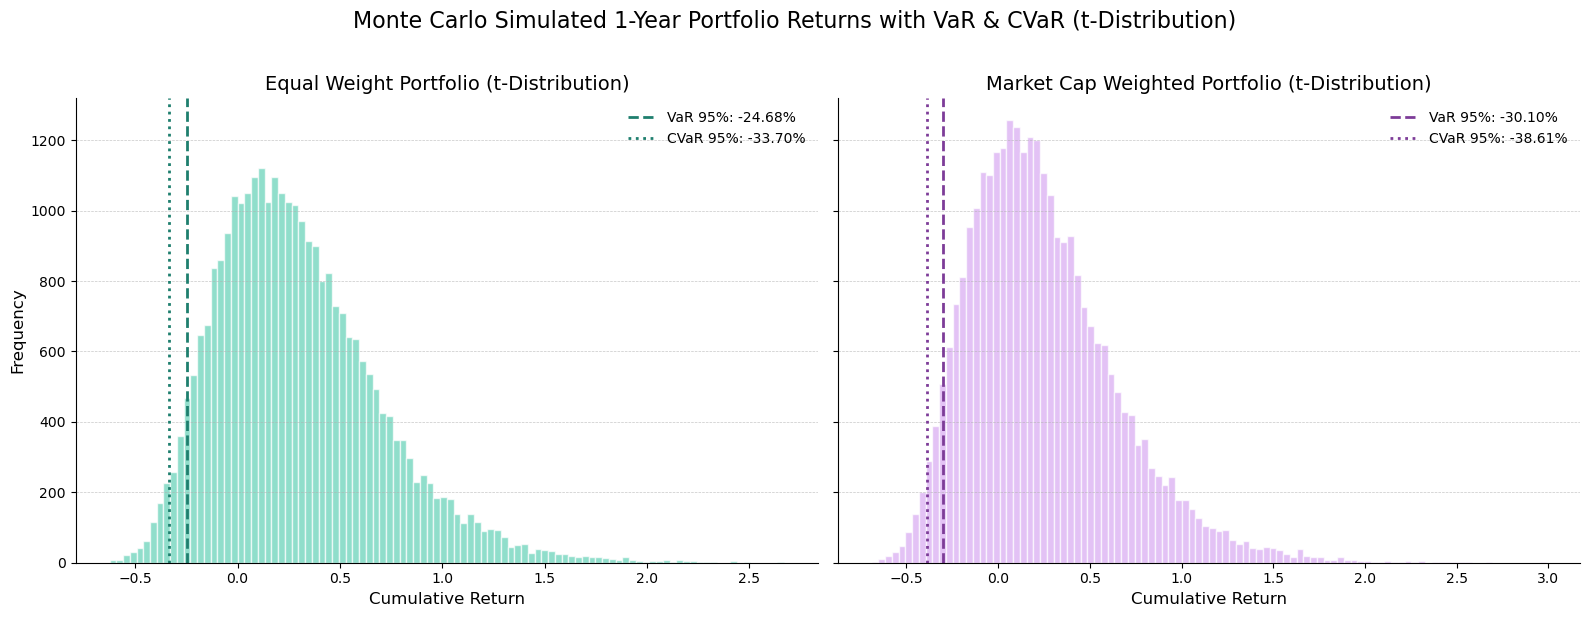

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# ---- Equal Weight Portfolio (t-distribution) ----
axes[0].hist(simulated_eq_returns_t, bins=100, color="#61D1B5", alpha=0.7, edgecolor='white')
axes[0].axvline(var_eq_t, color='#1E7F6E', linestyle='--', linewidth=2, label=f'VaR 95%: {var_eq_t:.2%}')
axes[0].axvline(cvar_eq_t, color='#1E7F6E', linestyle=':', linewidth=2, label=f'CVaR 95%: {cvar_eq_t:.2%}')
axes[0].set_title('Equal Weight Portfolio (t-Distribution)', fontsize=14)
axes[0].set_xlabel('Cumulative Return', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
axes[0].legend(frameon=False, fontsize=10)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# ---- Market Cap Weighted Portfolio (t-distribution) ----
axes[1].hist(simulated_cap_returns_t, bins=100, color="#D8A8F2", alpha=0.7, edgecolor='white')
axes[1].axvline(var_cap_t, color='#7D3C98', linestyle='--', linewidth=2, label=f'VaR 95%: {var_cap_t:.2%}')
axes[1].axvline(cvar_cap_t, color='#7D3C98', linestyle=':', linewidth=2, label=f'CVaR 95%: {cvar_cap_t:.2%}')
axes[1].set_title('Market Cap Weighted Portfolio (t-Distribution)', fontsize=14)
axes[1].set_xlabel('Cumulative Return', fontsize=12)
axes[1].grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
axes[1].legend(frameon=False, fontsize=10)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.suptitle('Monte Carlo Simulated 1-Year Portfolio Returns with VaR & CVaR (t-Distribution)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


# VaR and CVaR across all methods

In [47]:
data_summary = {
    'VaR (95%) Equal Weight': [var_eq, var_eq_t, hist_var_eq],
    'CVaR (95%) Equal Weight': [cvar_eq, cvar_eq_t, hist_cvar_eq],
    'VaR (95%) Market Cap': [var_cap, var_cap_t, hist_var_cap],
    'CVaR (95%) Market Cap': [cvar_cap, cvar_cap_t, hist_cvar_cap],
}

methods = ['Monte Carlo (Normal)', 'Monte Carlo (t-Distribution)', 'Historical Data']

summary_df = pd.DataFrame(data_summary, index=methods)
summary_df = summary_df.applymap(lambda x: f"{x:.2%}")  # Format as percentage
summary_df

C:\Users\User\AppData\Local\Temp\ipykernel_21980\3018591324.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary_df = summary_df.applymap(lambda x: f"{x:.2%}")  # Format as percentage


,VaR (95%) Equal Weight,CVaR (95%) Equal Weight,VaR (95%) Market Cap,CVaR (95%) Market Cap
Monte Carlo (Normal),-14.47%,-22.46%,-19.65%,-27.50%
Monte Carlo (t-Distribution),-24.68%,-33.70%,-30.10%,-38.61%
Historical Data,-15.93%,-18.56%,-8.66%,-10.90%


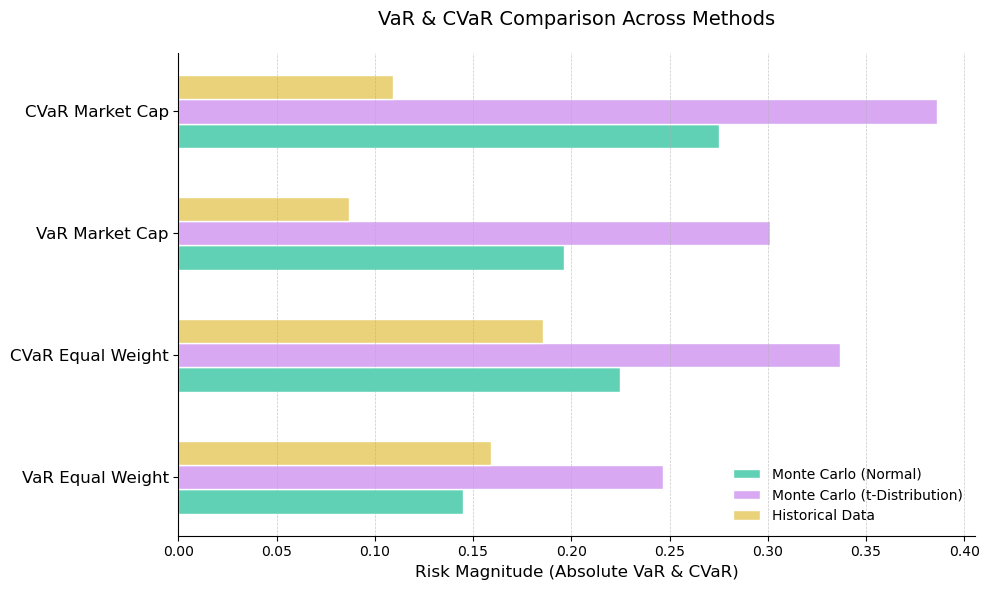

In [51]:
# Prepare the absolute values of risk metrics (so bars go left to right)
methods = ['Monte Carlo (Normal)', 'Monte Carlo (t-Distribution)', 'Historical Data']
metrics = ['VaR Equal Weight', 'CVaR Equal Weight', 'VaR Market Cap', 'CVaR Market Cap']

data_values = [
    [abs(var_eq), abs(cvar_eq), abs(var_cap), abs(cvar_cap)],
    [abs(var_eq_t), abs(cvar_eq_t), abs(var_cap_t), abs(cvar_cap_t)],
    [abs(hist_var_eq), abs(hist_cvar_eq), abs(hist_var_cap), abs(hist_cvar_cap)]
]

colors = ['#61D1B5', '#D8A8F2', "#E9D279"]

fig, ax = plt.subplots(figsize=(10, 6))

bar_height = 0.2
y_pos = np.arange(len(metrics))

for i, (method, values) in enumerate(zip(methods, data_values)):
    ax.barh(y_pos + i * bar_height, values, height=bar_height, label=method, color=colors[i], edgecolor='white')

# Labels and styling
ax.set_yticks(y_pos + bar_height)
ax.set_yticklabels(metrics, fontsize=12)
ax.set_xlabel('Risk Magnitude (Absolute VaR & CVaR)', fontsize=12)
ax.set_title('VaR & CVaR Comparison Across Methods', fontsize=14, pad=20)
ax.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, fontsize=10)

# Clean up spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


| Metric                      | Monte Carlo (Normal) | Monte Carlo (t-Distribution) | Historical Data |
| --------------------------- | -------------------- | ---------------------------- | --------------- |
| **VaR (95%) Equal Weight**  | -14.47%              | **-24.68%**                  | -15.93%         |
| **CVaR (95%) Equal Weight** | -22.46%              | **-33.70%**                  | -18.56%         |
| **VaR (95%) Market Cap**    | -19.65%              | **-30.10%**                  | -8.66%          |
| **CVaR (95%) Market Cap**   | -27.50%              | **-38.61%**                  | -10.90%         |

* t-Distribution gives the highest risk estimates across all metrics
→ Captures fat tails and systemic risk

* Normal Monte Carlo tends to overestimate Market Cap risk relative to historical but underestimates tail risks compared to t-Distribution

* Historical data shows the mildest risk levels, particularly for the Market Cap Weighted Portfolio

| Portfolio        | Simulated Risk (Normal) | Simulated Risk (t-Dist)   | Historical Risk        |
| ---------------- | ----------------------- | ------------------------- | ---------------------- |
| **Equal Weight** | Lower VaR, Lower CVaR   | Lower VaR, Lower CVaR     | Higher Historical Risk |
| **Market Cap**   | Higher VaR, Higher CVaR | Highest VaR, Highest CVaR | Lower Historical Risk  |

* Simulations (both Normal and t-Dist) suggest Market Cap Weighted Portfolio is riskier, especially in stressed scenarios

* Historically, the Market Cap Portfolio showed smaller losses, likely because large-cap stocks are more stable in practice

* Equal Weight Portfolio historically experienced worse drawdowns, but simulations suggest it could behave better in severe future tail events